In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from math import exp,sqrt
from scipy import optimize as op

# Data Preprocessing

In [ ]:
data = pd.read_csv('./data/04_cricket_1999to2011.csv')
for i in range(len(data)):
    if data.iloc[i]['Over']==1:
        data.iloc[i]['Total.Runs'] = data.iloc[i]['Runs']
    else:
        data.iloc[i]['Total.Runs'] = data.iloc[i]['Runs'] + data.iloc[i-1]['Total.Runs']
countries = data['At.Bat'].unique()
country_data = dict()
for country in countries:
    country_data[country] = data[data['At.Bat']==country].filter(items=['Over','Innings.Total.Runs','Total.Runs','Wickets.in.Hand'])

# Plotting functions

In [233]:
def plot(Z,b,country):
    func = lambda w,o : Z[w-1]*(1-exp(-1*b[w-1]*o))
    pyplot.title(country)
    for w in range(1,11):
        x = range(0,51)
        y = np.array([func(w,o) for o in range(0,51)])
        pyplot.plot(x,y,label=str(w))
        pyplot.text(x[-5],y[-5],w)
    pyplot.show()

def cplot(country='India'):
    cdata = country_data[country]
    for w in range(1,11):
        d = cdata[cdata['Wickets.in.Hand']==w]
        overs = 50-d['Over']
        runs = d['Innings.Total.Runs']-d['Total.Runs']
        pyplot.scatter(overs,runs)
    pyplot.show()

# Objective function 1

In [222]:
def obj1(x,overs,runs):
    z,b = x
    func = np.multiply(z,np.subtract(1,np.exp(np.multiply(-1*b,overs))))
    error = np.subtract(runs,func)
    error = sqrt(np.sum(np.square(error)))/len(runs)
    return error

def DuckworthLewis20Params(country='India'):
    Z0 = np.zeros(10)
    b = np.zeros(10)
    cdata = country_data[country]
    for w in range(1,11):
        d = cdata[cdata['Wickets.in.Hand']==w]
        overs = 50-d['Over']
        runs = d['Innings.Total.Runs']-d['Total.Runs']
        #res = op.minimize(fun=obj1,x0=np.array([250,0.1]),args=(overs,runs))
        #Z0[w-1],b[w-1]=res.x
        Z0[w-1],b[w-1]=op.fmin(func=obj1,x0=np.array([250,0.1]),args=(overs,runs),disp=False)
    return Z0,b


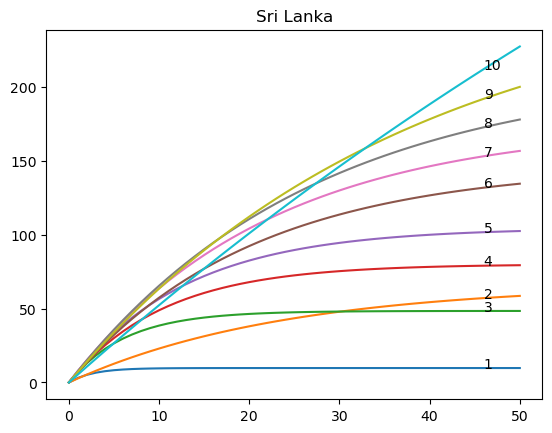

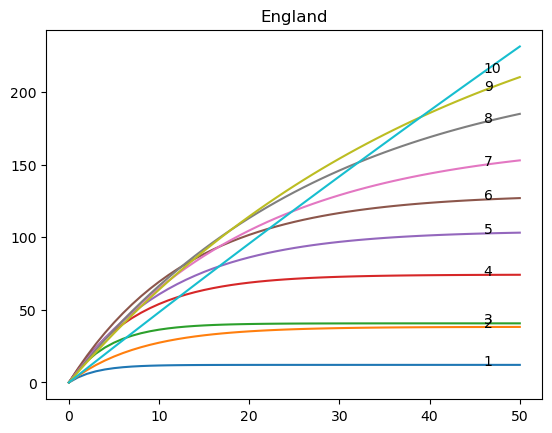

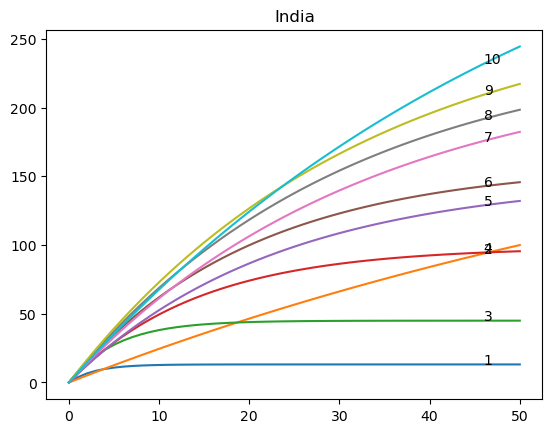

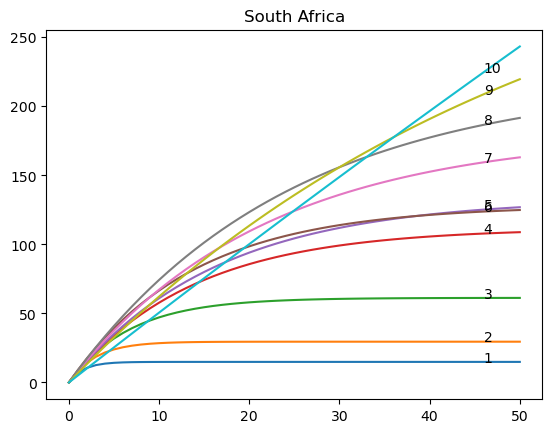

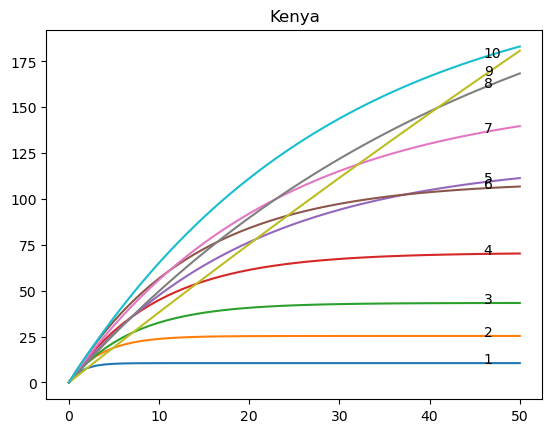

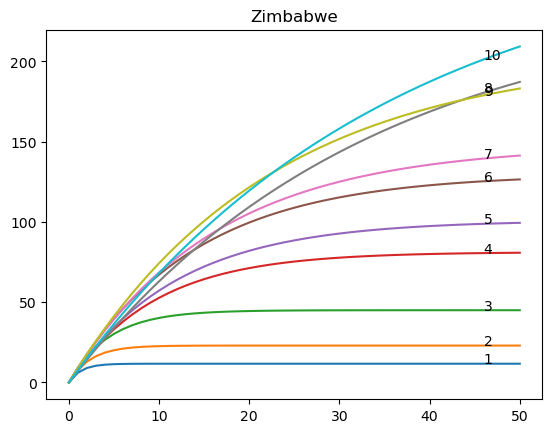

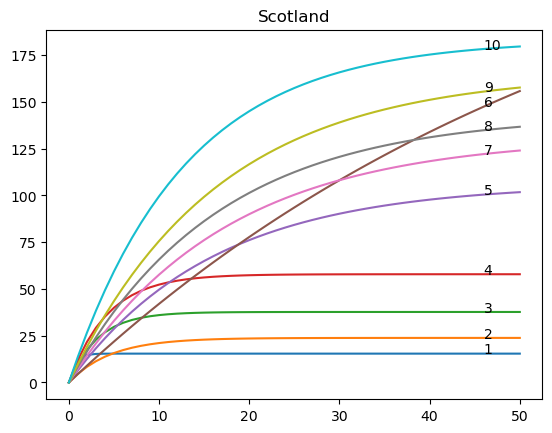

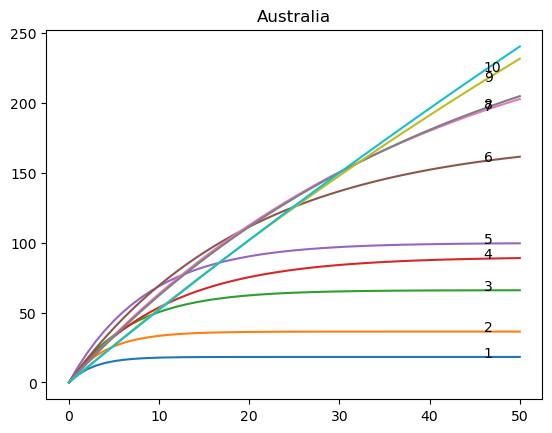

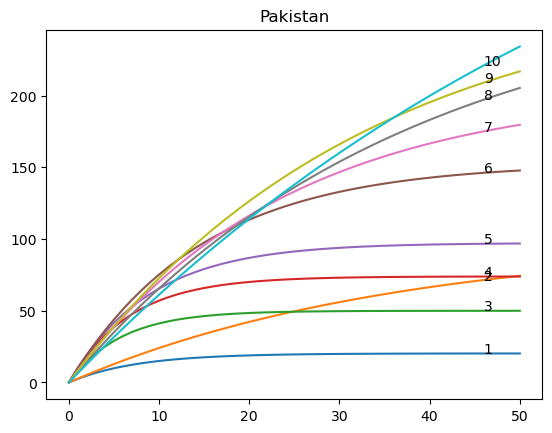

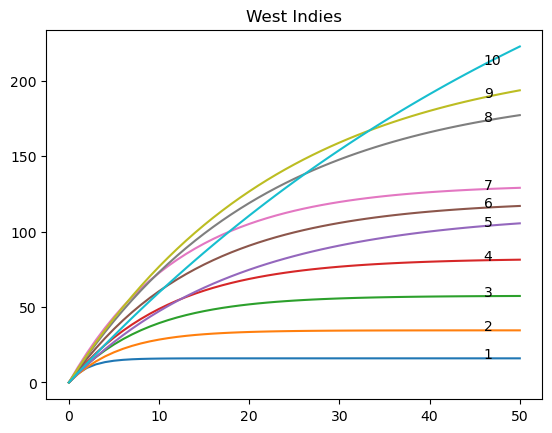

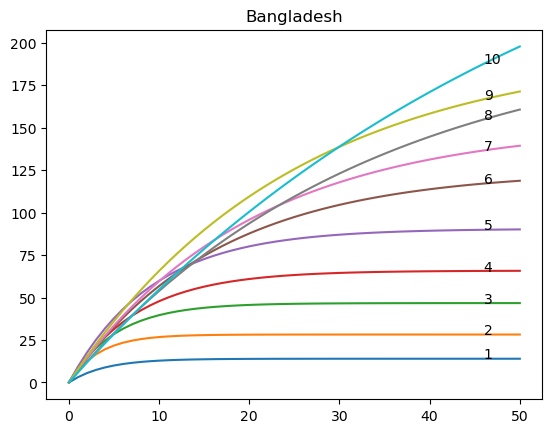

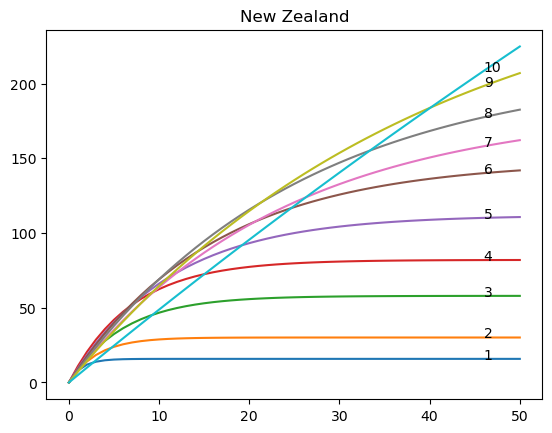

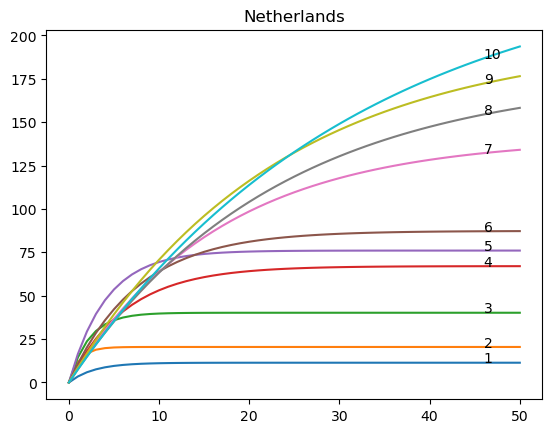

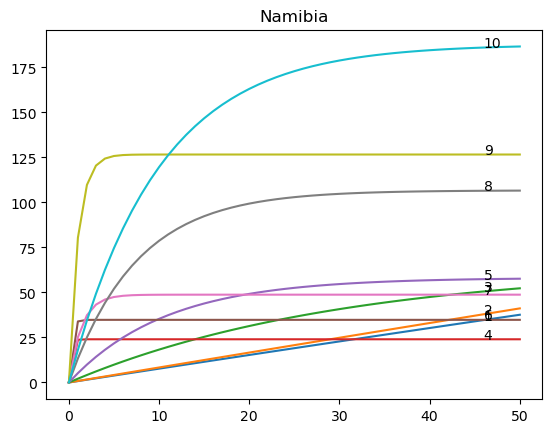

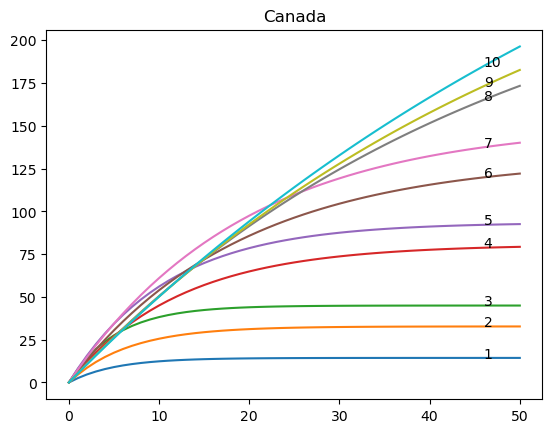

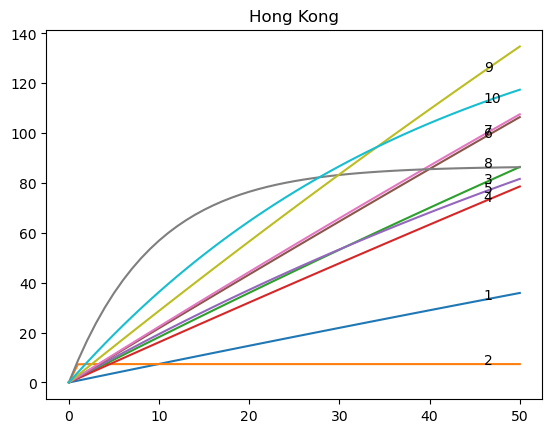

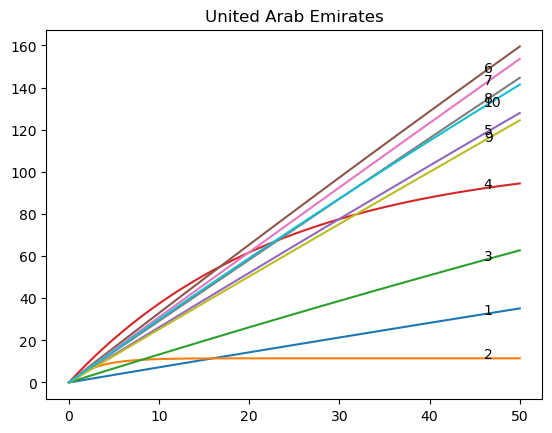

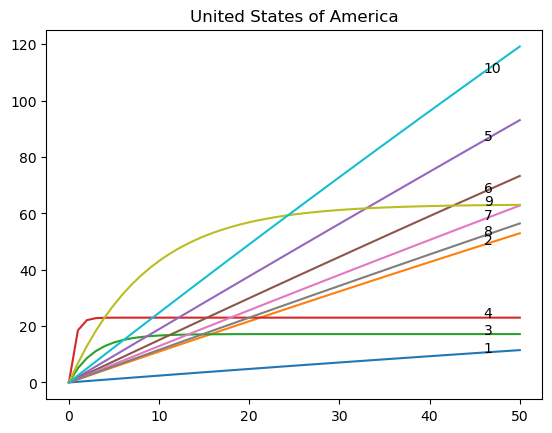

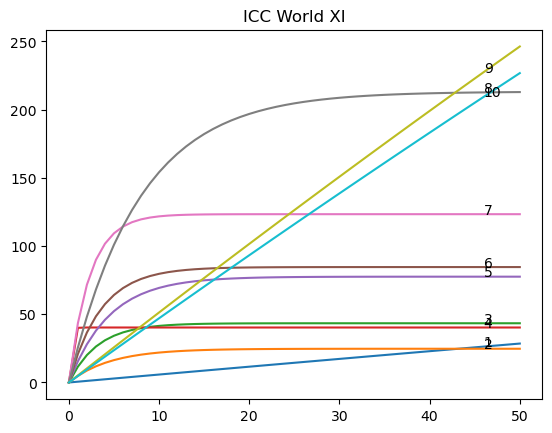

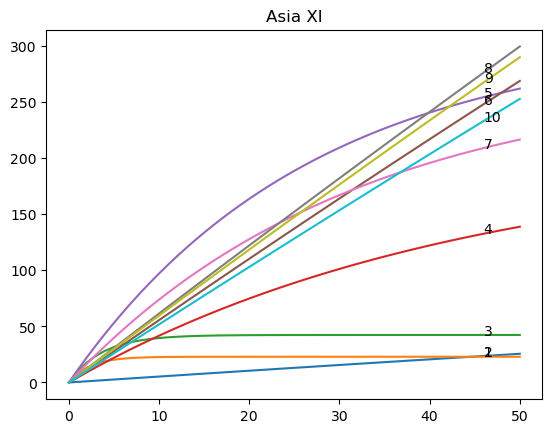

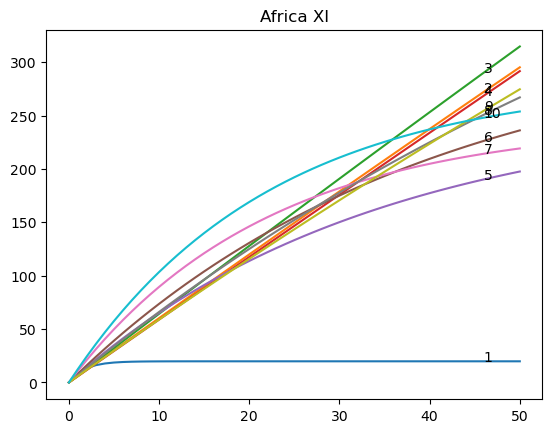

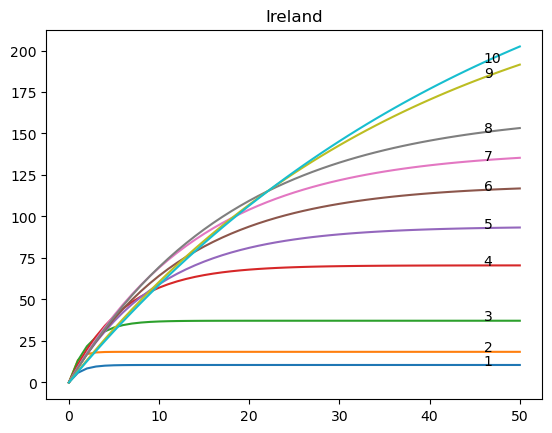

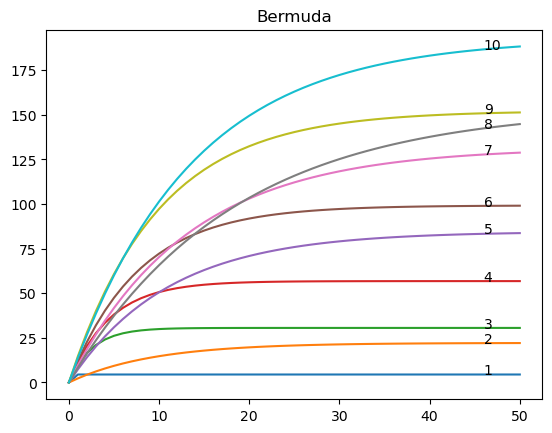

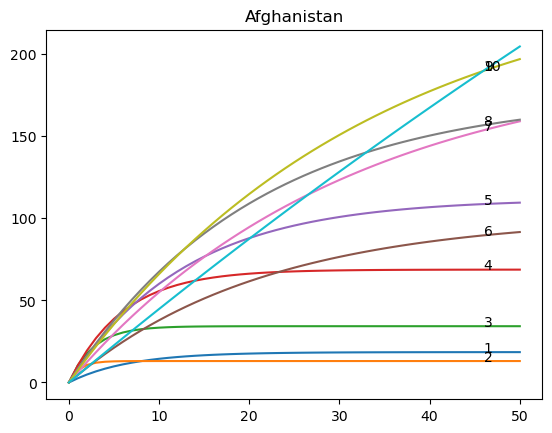

In [234]:
for country in countries:
    Z0,b = DuckworthLewis20Params(country=country)
    plot(Z0,b,country)